# Import Data

In [1]:
import pandas as pd
import numpy as np 

In [2]:
data = pd.read_csv('Data/bbni_data_5y.csv')

In [3]:
data['date_str'] = pd.to_datetime(data['date_str'])

In [4]:
# rename columns
data = data.rename(columns={'date_str': 'date'})

In [5]:
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,date
0,3245.003550,3288.270264,3147.653443,3288.270264,47956400,0.0,0.0,2019-11-07
1,3309.903293,3331.536648,3245.003229,3320.719971,34375400,0.0,0.0,2019-11-08
2,3288.270320,3309.903678,3245.003606,3266.636963,29695800,0.0,0.0,2019-11-11
3,3245.003550,3288.270264,3223.370193,3288.270264,43277200,0.0,0.0,2019-11-12
4,3288.270302,3288.270302,3180.103516,3180.103516,47613000,0.0,0.0,2019-11-13


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1213 entries, 0 to 1212
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Open          1213 non-null   float64       
 1   High          1213 non-null   float64       
 2   Low           1213 non-null   float64       
 3   Close         1213 non-null   float64       
 4   Volume        1213 non-null   int64         
 5   Dividends     1213 non-null   float64       
 6   Stock Splits  1213 non-null   float64       
 7   date          1213 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 75.9 KB


In [7]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
date            0
dtype: int64

# Feature Engineering

In [8]:
data['Dividends'].value_counts()

Dividends
0.00000      1208
103.12054       1
22.01131        1
73.14845        1
196.39006       1
280.49518       1
Name: count, dtype: int64

In [9]:
data['Stock Splits'].value_counts()

Stock Splits
0.0    1211
2.0       2
Name: count, dtype: int64

In [10]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)

In [11]:
# 1. Menghitung Return Harian
data['return'] = data['Close'].pct_change()
data['log_return'] = np.log(data['Close'] / data['Close'].shift(1))

In [12]:
# 2. Moving Averages
data['ma_5'] = data['Close'].rolling(window=5).mean()
data['ma_10'] = data['Close'].rolling(window=10).mean()
data['ma_20'] = data['Close'].rolling(window=20).mean()

In [13]:
# 3. Exponential Moving Average (EMA)
data['ema_10'] = data['Close'].ewm(span=10, adjust=False).mean()
data['ema_20'] = data['Close'].ewm(span=20, adjust=False).mean()

In [14]:
# 4. Bollinger Bands
data['bollinger_mid'] = data['Close'].rolling(window=20).mean()
data['bollinger_std'] = data['Close'].rolling(window=20).std()
data['bollinger_upper'] = data['bollinger_mid'] + (2 * data['bollinger_std'])
data['bollinger_lower'] = data['bollinger_mid'] - (2 * data['bollinger_std'])

In [15]:
# 10. Penambahan Fitur Waktu
data['day_of_week'] = data['date'].dt.dayofweek  # 0 = Monday, 6 = Sunday
data['month'] = data['date'].dt.month

In [16]:
# Hapus data yang mengandung nilai NaN akibat perhitungan rolling
data = data.dropna().reset_index(drop=True)

In [17]:
data.head()

,Open,High,Low,Close,Volume,date,return,log_return,ma_5,ma_10,ma_20,ema_10,ema_20,bollinger_mid,bollinger_std,bollinger_upper,bollinger_lower,day_of_week,month
0,3245.003502,3266.636858,3212.553467,3212.553467,42196800,2019-12-04,-0.016556,-0.016695,3238.513525,3255.820166,3254.738501,3247.538989,3255.803649,3254.738501,47.590787,3349.920075,3159.556926,2,12
1,3223.370117,3255.820152,3212.553439,3223.370117,53985800,2019-12-05,0.003367,0.003361,3242.840186,3245.003491,3251.493494,3243.144648,3252.714741,3251.493494,47.396298,3346.286090,3156.700897,3,12
2,3245.003336,3299.086725,3234.186658,3277.453369,29544800,2019-12-06,0.016778,0.016639,3249.330176,3241.758472,3249.330164,3249.382598,3255.070801,3249.330164,44.996949,3339.324061,3159.336266,4,12
3,3299.086725,3309.903402,3255.820014,3277.453369,36970600,2019-12-09,0.000000,0.000000,3251.493457,3245.003467,3249.870984,3254.486374,3257.202474,3249.870984,45.280019,3340.431022,3159.310946,0,12
4,3277.453585,3309.903621,3255.820228,3288.270264,38381200,2019-12-10,0.003300,0.003295,3255.820117,3249.330151,3249.870984,3260.628900,3260.161311,3249.870984,45.280019,3340.431022,3159.310946,1,12


In [18]:
data.isnull().sum()

Open               0
High               0
Low                0
Close              0
Volume             0
date               0
return             0
log_return         0
ma_5               0
ma_10              0
ma_20              0
ema_10             0
ema_20             0
bollinger_mid      0
bollinger_std      0
bollinger_upper    0
bollinger_lower    0
day_of_week        0
month              0
dtype: int64

# Modelling

## Preprocessing

In [19]:
dataUsed = data[['Close', 'Volume', 'ma_5', 'ma_10', 'ema_10', 'bollinger_mid', 'bollinger_std', 'bollinger_upper', 'bollinger_lower', 'day_of_week', 'month']]

In [20]:
from sklearn.preprocessing import MinMaxScaler

# preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(dataUsed)

data_scaled

array([[0.39722655, 0.09501956, 0.38797812, ..., 0.46656508, 0.5       ,
        1.        ],
       [0.39960833, 0.12156626, 0.38896933, ..., 0.46593506, 0.75      ,
        1.        ],
       [0.41151722, 0.06652955, 0.39045615, ..., 0.4665164 , 1.        ,
        1.        ],
       ...,
       [0.87889247, 0.07306342, 0.85452522, ..., 0.901559  , 0.25      ,
        0.90909091],
       [0.8183387 , 0.151354  , 0.84994334, ..., 0.8932178 , 0.5       ,
        0.90909091],
       [0.80732892, 0.02430388, 0.84192505, ..., 0.88300305, 0.75      ,
        0.90909091]])

## Train Test Sequence

In [21]:
import numpy as np

sequence_length = 60
x = []
y = []

# Target tetap kolom 0 (harga close), tetapi kita hanya menggunakan kolom lain sebagai input
for i in range(sequence_length, len(data_scaled)):
    x.append(data_scaled[i-sequence_length:i, 1:])  
    y.append(data_scaled[i, 0]) 

# Konversi ke array numpy
x, y = np.array(x), np.array(y)


In [22]:
print(x.shape, y.shape)

(1134, 60, 10) (1134,)


## LSTM

In [23]:
from sklearn.model_selection import train_test_split

# train and test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [25]:
# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [26]:
# train model with early stopping
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test), verbose=1)

Epoch 1/100
29/29 [==============================] - 7s 65ms/step - loss: 0.0440 - val_loss: 0.0049
Epoch 2/100
29/29 [==============================] - 1s 33ms/step - loss: 0.0088 - val_loss: 0.0029
Epoch 3/100
29/29 [==============================] - 1s 36ms/step - loss: 0.0069 - val_loss: 0.0030
Epoch 4/100
29/29 [==============================] - 1s 35ms/step - loss: 0.0074 - val_loss: 0.0027
Epoch 5/100
29/29 [==============================] - 1s 34ms/step - loss: 0.0073 - val_loss: 0.0026
Epoch 6/100
29/29 [==============================] - 1s 32ms/step - loss: 0.0073 - val_loss: 0.0033
Epoch 7/100
29/29 [==============================] - 1s 33ms/step - loss: 0.0058 - val_loss: 0.0024
Epoch 8/100
29/29 [==============================] - 1s 33ms/step - loss: 0.0059 - val_loss: 0.0028
Epoch 9/100
29/29 [==============================] - 1s 32ms/step - loss: 0.0059 - val_loss: 0.0023
Epoch 10/100
29/29 [==============================] - 1s 32ms/step - loss: 0.0055 - val_loss: 0.0024

In [27]:
# prediction
predicted_prices =  model.predict(x_test)


8/8 [==============================] - 1s 10ms/step


In [28]:
# Dapatkan jumlah kolom yang diharapkan oleh scaler
expected_columns = scaler.min_.shape[0] 

# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
predicted_prices_padded = np.hstack([np.zeros((predicted_prices.shape[0], expected_columns - 1)), predicted_prices])

# Inverse transform dan ambil hanya kolom harga 'Close'
predicted_prices = scaler.inverse_transform(predicted_prices_padded)[:, -1]  # Ambil hanya kolom harga


In [29]:
# Tambahkan kolom nol untuk menyesuaikan jumlah kolom
real_prices_padded = np.hstack([np.zeros((y_test.shape[0], expected_columns - 1)), y_test.reshape(-1,1)])

# Inverse transform dan ambil hanya kolom harga 'Close'
real_prices = scaler.inverse_transform(real_prices_padded)[:, -1]  # Ambil hanya kolom harga


# Evaluation

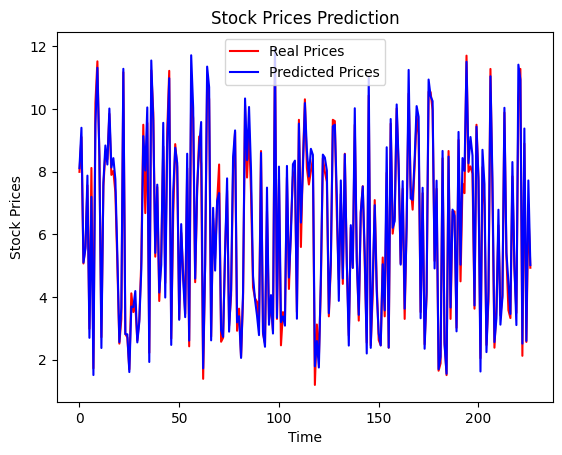

In [30]:
# conpare real and predicted prices
import matplotlib.pyplot as plt

plt.plot(real_prices, color='red', label='Real Prices')
plt.plot(predicted_prices, color='blue', label='Predicted Prices')
plt.title('Stock Prices Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

In [31]:
print("Real Prices: ", real_prices)
print("Predicted Prices: ", predicted_prices)
print("Difference: ", real_prices - predicted_prices)

Real Prices:  [ 7.99075759  9.10036397  5.0680384   5.61202706  7.56066146  2.98661621
  8.11468703  1.72338748 10.18338701 11.51606778  8.45309388  2.71669484
  7.53296048  8.62646925  8.3953017   9.84010155  7.89307562  8.01965428
  7.33905123  5.04083947  2.51155565  3.30007716 11.16931705  2.82466387
  2.70589806  1.69099683  4.11605986  3.51767275  3.76246785  2.60872701
  3.28352836  5.14963696  9.49334964  6.67422114  9.55114182  2.22004101
 11.22710805  9.88061817  5.28563398  7.50525949  3.87126535  5.44883052
  8.7998458   4.44418677  9.29107758 11.21280104  2.67350771  6.64651897
  8.87542565  8.14238801  3.30007716  6.04721705  4.76809147  3.46327429
  8.10634196  2.42518079 10.48615584  9.69895687  4.47117932  7.3944532
  9.11770103  8.24566648  1.38868599  5.04083947 10.9100322  10.30449454
  2.73432995  6.50801347  5.23123494  7.00663589  8.22549214  2.571134
  2.70169123  5.50322897  7.3944532   3.08248217  4.03930678  8.0315829
  9.26296976  2.92183492  3.62647083  2.0

In [32]:
# calculate RMSE
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(real_prices, predicted_prices))
rmse

0.39157715540705756

In [33]:
# calculate MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(real_prices, predicted_prices)
mae

0.3013261748239152

Directional Accuracy adalah metrik yang digunakan untuk mengukur seberapa baik model memprediksi arah perubahan harga (naik atau turun) dibandingkan dengan nilai aktual. Ini adalah metrik yang sangat berguna dalam prediksi saham karena dalam banyak kasus, arah perubahan harga lebih penting daripada nilai absolut dari harga itu sendiri—terutama jika tujuannya adalah untuk membuat keputusan beli atau jual.

In [34]:
# direction accuracy
direction_accuracy = np.mean(np.sign(real_prices[1:] - real_prices[:-1]) == np.sign(predicted_prices[1:] - predicted_prices[:-1]))
direction_accuracy

0.9734513274336283

# Save Model

In [35]:
# Save the entire model
model.save('Model/lstm_model_bbni.h5')


c:\Users\thari\anaconda3\envs\ML\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
